In [9]:
import numpy as np
from matplotlib import pyplot as plt
from math import sin, cos, atan2, pi, ceil, sqrt

In [10]:
def resize(img,w,h,w2,h2):
    resize_img = np.zeros((h2,w2),dtype=np.uint8)
    x_ratio = (w-1)/w2
    y_ratio = (h-1)/h2
    pix = np.ravel(img)
    for i in range(h2):
        for j in range(w2):
            x = int(x_ratio*j)
            y = int(y_ratio*i)
            x_diff = (x_ratio*j)-x
            y_diff = (y_ratio*i)-y
            index = y*w+x
            A = pix[index]
            B = pix[index+1]
            C = pix[index+w]
            D = pix[index+w+1]
            
            gray = int(A*(1-x_diff)*(1-y_diff)+B*(x_diff)*(1-y_diff)+C*(y_diff)*(1-x_diff) + D*(x_diff*y_diff))
            resize_img[i,j] = gray
    return resize_img

92 97
93 208
205 96


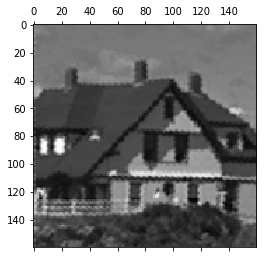

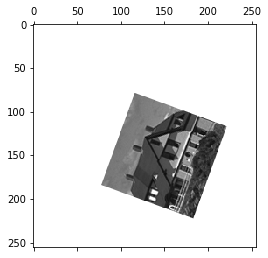

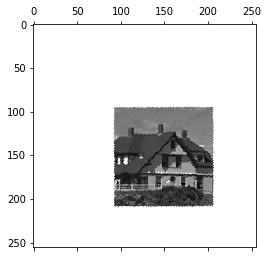

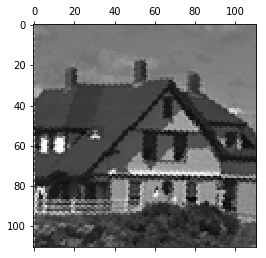

In [11]:
raw_image = open('lighthouse1.raw','rb').read()
raw_image = np.frombuffer(raw_image, np.uint8)
img = raw_image[0:256*256]
img = np.reshape(img, (256,256))
#plt.matshow(img,cmap='gray')
#plt.show()

k=0
for i in range(256):
    for j in range(256):
        if (img[i][j]!=255):
            k=1
            x1,y1 = j-128,(255-i)-128
            break
    if k==1:
        break

k=0
for i in range(256):
    for j in range(256):
        if (img[j][i]!=255):
            k=1
            x2,y2 = i-128,(255-j)-128
            break
    if k==1:
        break
k=0
for i in range(255,-1,-1):
    for j in range(256):
        if (img[i][j]!=255):
            k=1
            x3,y3 = j-128,(255-i)-128
            break
    if k==1:
        break
k=0
for i in range(255,-1,-1):
    for j in range(256):
        if (img[j][i]!=255):
            k=1
            x4,y4 = i-128,(255-j)-128
            break
    if k==1:
        break

s1= sqrt((x1-x2)**2+(y1-y2)**2)
s2= sqrt((x2-x3)**2+(y2-y3)**2)
s3= sqrt((x3-x4)**2+(y3-y4)**2)
s4= sqrt((x4-x1)**2+(y4-y1)**2)
theta = 2*pi - atan2(y1-y2,x1-x2)
x_center = (x1+x3)/2
y_center = (y1+y3)/2
#xshift,yshift = x_center - 128, y_center - 128
rotate = np.array(((cos(theta),-sin(theta),0),(sin(theta),cos(theta),0),(0,0,1)))
translate = np.array(((1,0,x_center),(0,1,y_center),(0,0,1)))
translate_back = np.array(((1,0,-x_center),(0,1,-y_center),(0,0,1)))
rotate_inv = np.linalg.inv(rotate)
translate_inv = np.linalg.inv(translate)
translate_back_inv = np.linalg.inv(translate_back)
new_img = np.zeros((256,256),np.uint8)

for i in range(256):
    for j in range(256):
        x = j - 128
        y = 255-i - 128
        med = np.matmul(translate_inv,np.array((x,y,1)))
        med1 = np.matmul(rotate_inv,med)
        final = np.matmul(translate_back_inv,med1)
        u = final[0]
        v = final[1]
        alpha = u - int(u)
        beta = v - int(v)
        u,v = int(u)+128, 255-128-int(v)
        if u>255 or u<0 or v>255 or v<0:
            new_img[i,j] = 255
            continue
        new_img[i,j] = img[v,u]

#k=0
#for i in range(256):
#    for j in range(256):
#        if (new_img[j][i]!=255):
#            k=1
#            x1_new,y1_new = i,j+1
#            break
#    if k==1:
#        break
#
#k=0
#for i in range(256):
#    for j in range(255,-1,-1):
#        if (new_img[j][i]!=255):
#            k=1
#            x2_new,y2_new = i,j-1
#            break
#    if k==1:
#        break
#
#k=0
#for i in range(255,-1,-1):
#    for j in range(256):
#        if (new_img[j][i]!=255):
#            k=1
#            x3_new,y3_new= i,j+1
#            break
#    if k==1:
#        break
#print(x1_new,y1_new)
#print(x2_new,y2_new)
#print(x3_new,y3_new)
#length = y2_new - y1_new
#width = x3_new - x1_new
#x3_new,y3_new = x1_new + width, y1_new
#x4_new, y4_new = x2_new + width, y2_new
k=0
for i in range(256):
    for j in range(256):
        if (new_img[j][i]!=255):
            k=1
            x1_new,y1_new = i,j+1
            break
    if k==1:
        break

k=0
for i in range(255,-1,-1):
    for j in range(256):
        if (new_img[i][j]!=255):
            k=1
            x2_new,y2_new = j,i-1
            break
    if k==1:
        break

k=0
for i in range(256):
    for j in range(255,-1,-1):
        if (new_img[i][j]!=255):
            k=1
            x3_new,y3_new= j,i+1
            break
    if k==1:
        break
print(x1_new,y1_new)
print(x2_new,y2_new)
print(x3_new,y3_new)
length = y2_new - y1_new
width = x3_new - x1_new
x2_new= x1_new
x3_new,y3_new = x1_new + width, y1_new
x4_new,y4_new = x2_new + width, y2_new


crop_img = new_img[y1_new:y2_new,x1_new+1:x3_new-1]

resize_img = resize(crop_img,crop_img.shape[1],crop_img.shape[0],160,160)

with open("resize1.txt",'w') as f:
    for i in range(160):
        for j in range(160):
            f.write(str(resize_img[i][j]) + '\n')

f.close
    
plt.matshow(resize_img,cmap='gray')
plt.matshow(img,cmap='gray')
plt.matshow(new_img,cmap='gray')
plt.matshow(crop_img,cmap='gray')

plt.show()
             

43 65
47 184
155 37


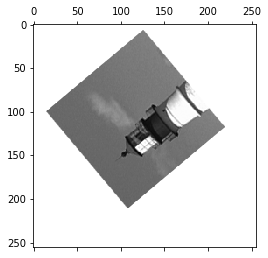

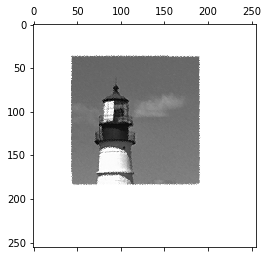

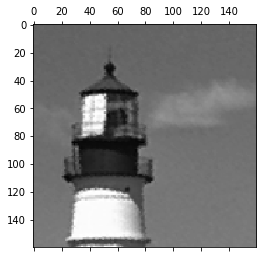

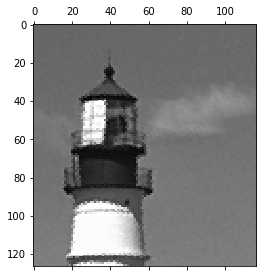

In [13]:
raw_image = open('lighthouse2.raw','rb').read()
raw_image = np.frombuffer(raw_image, np.uint8)
img = raw_image[0:256*256]
img = np.reshape(img, (256,256))
plt.matshow(img,cmap='gray')
#plt.show()

k=0
for i in range(256):
    for j in range(256):
        if (img[i][j]!=255):
            k=1
            x1,y1 = j-128,(255-i)-128
            break
    if k==1:
        break

k=0
for i in range(256):
    for j in range(256):
        if (img[j][i]!=255):
            k=1
            x2,y2 = i-128,(255-j)-128
            break
    if k==1:
        break
k=0
for i in range(255,-1,-1):
    for j in range(256):
        if (img[i][j]!=255):
            k=1
            x3,y3 = j-128,(255-i)-128
            break
    if k==1:
        break
k=0
for i in range(255,-1,-1):
    for j in range(256):
        if (img[j][i]!=255):
            k=1
            x4,y4 = i-128,(255-j)-128
            break
    if k==1:
        break

s1= sqrt((x1-x2)**2+(y1-y2)**2)
s2= sqrt((x2-x3)**2+(y2-y3)**2)
s3= sqrt((x3-x4)**2+(y3-y4)**2)
s4= sqrt((x4-x1)**2+(y4-y1)**2)
theta = 2*pi - atan2(y1-y2,x1-x2) - pi/2
x_center = (x1+x3)/2
y_center = (y1+y3)/2
#xshift,yshift = x_center - 128, y_center - 128
rotate = np.array(((cos(theta),-sin(theta),0),(sin(theta),cos(theta),0),(0,0,1)))
translate = np.array(((1,0,x_center),(0,1,y_center),(0,0,1)))
translate_back = np.array(((1,0,-x_center),(0,1,-y_center),(0,0,1)))
rotate_inv = np.linalg.inv(rotate)
translate_inv = np.linalg.inv(translate)
translate_back_inv = np.linalg.inv(translate_back)
new_img = np.zeros((256,256),np.uint8)

for i in range(256):
    for j in range(256):
        x = j - 128
        y = 255-i - 128
        med = np.matmul(translate_inv,np.array((x,y,1)))
        med1 = np.matmul(rotate_inv,med)
        final = np.matmul(translate_back_inv,med1)
        u = final[0]
        v = final[1]
        alpha = u - int(u)
        beta = v - int(v)
        u,v = int(u)+128, 255-128-int(v)
        if u>255 or u<0 or v>255 or v<0:
            new_img[i,j] = 255
            continue
        new_img[i,j] = img[v,u]

k=0
for i in range(256):
    for j in range(256):
        if (new_img[j][i]!=255):
            k=1
            x1_new,y1_new = i,j+1
            break
    if k==1:
        break

k=0
for i in range(255,-1,-1):
    for j in range(256):
        if (new_img[i][j]!=255):
            k=1
            x2_new,y2_new = j,i-1
            break
    if k==1:
        break

k=0
for i in range(256):
    for j in range(255,-1,-1):
        if (new_img[i][j]!=255):
            k=1
            x3_new,y3_new= j,i+1
            break
    if k==1:
        break
print(x1_new,y1_new)
print(x2_new,y2_new)
print(x3_new,y3_new)
length = y2_new - y1_new
width = x3_new - x1_new
x2_new= x1_new
x3_new,y3_new = x1_new + width, y1_new
x4_new,y4_new = x2_new + width, y2_new

#crop_img = new_img[y1_new:y2_new,x1_new+1:x3_new-1]
crop_img = new_img[49:176,55:172]
resize_img = resize(crop_img,crop_img.shape[1],crop_img.shape[0],160,160)
with open("resize2.txt",'w') as f:
    for i in range(160):
        for j in range(160):
            f.write(str(resize_img[i][j]) + '\n')

f.close    
plt.matshow(new_img,cmap='gray')
plt.matshow(resize_img,cmap='gray')
plt.matshow(crop_img,cmap='gray')
plt.show()

18 22
20 234
233 19


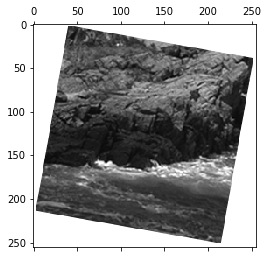

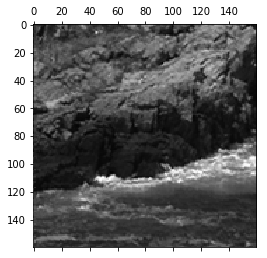

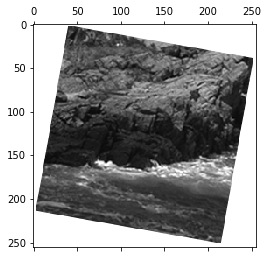

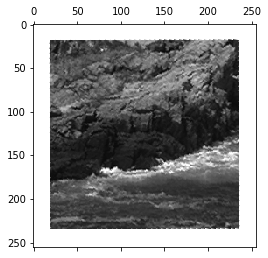

In [15]:
raw_image = open('lighthouse3.raw','rb').read()
raw_image = np.frombuffer(raw_image, np.uint8)
img = raw_image[0:256*256]
img = np.reshape(img, (256,256))
plt.matshow(img,cmap='gray')
#plt.show()

k=0
for i in range(256):
    for j in range(256):
        if (img[i][j]!=255):
            k=1
            x1,y1 = j-128,(255-i)-128
            break
    if k==1:
        break

k=0
for i in range(256):
    for j in range(256):
        if (img[j][i]!=255):
            k=1
            x2,y2 = i-128,(255-j)-128
            break
    if k==1:
        break
k=0
for i in range(255,-1,-1):
    for j in range(256):
        if (img[i][j]!=255):
            k=1
            x3,y3 = j-128,(255-i)-128
            break
    if k==1:
        break
k=0
for i in range(255,-1,-1):
    for j in range(256):
        if (img[j][i]!=255):
            k=1
            x4,y4 = i-128,(255-j)-128
            break
    if k==1:
        break

s1= sqrt((x1-x2)**2+(y1-y2)**2)
s2= sqrt((x2-x3)**2+(y2-y3)**2)
s3= sqrt((x3-x4)**2+(y3-y4)**2)
s4= sqrt((x4-x1)**2+(y4-y1)**2)
theta = 2*pi - atan2(y1-y2,x1-x2) + pi/2
x_center = (x1+x3)/2
y_center = (y1+y3)/2
#xshift,yshift = x_center - 128, y_center - 128
rotate = np.array(((cos(theta),-sin(theta),0),(sin(theta),cos(theta),0),(0,0,1)))
translate = np.array(((1,0,x_center),(0,1,y_center),(0,0,1)))
translate_back = np.array(((1,0,-x_center),(0,1,-y_center),(0,0,1)))
rotate_inv = np.linalg.inv(rotate)
translate_inv = np.linalg.inv(translate)
translate_back_inv = np.linalg.inv(translate_back)
new_img = np.zeros((256,256),np.uint8)

for i in range(256):
    for j in range(256):
        x = j - 128
        y = 255-i - 128
        med = np.matmul(translate_inv,np.array((x,y,1)))
        med1 = np.matmul(rotate_inv,med)
        final = np.matmul(translate_back_inv,med1)
        u = final[0]
        v = final[1]
        alpha = u - int(u)
        beta = v - int(v)
        u,v = int(u)+128, 255-128-int(v)
        if u>255 or u<0 or v>255 or v<0:
            new_img[i,j] = 255
            continue
        new_img[i,j] = img[v,u]

k=0
for i in range(256):
    for j in range(256):
        if (new_img[j][i]!=255):
            k=1
            x1_new,y1_new = i,j+1
            break
    if k==1:
        break

k=0
for i in range(255,-1,-1):
    for j in range(256):
        if (new_img[i][j]!=255):
            k=1
            x2_new,y2_new = j,i-1
            break
    if k==1:
        break

k=0
for i in range(256):
    for j in range(255,-1,-1):
        if (new_img[i][j]!=255):
            k=1
            x3_new,y3_new= j,i+1
            break
    if k==1:
        break
print(x1_new,y1_new)
print(x2_new,y2_new)
print(x3_new,y3_new)
length = y2_new - y1_new
width = x3_new - x1_new
x2_new= x1_new
x3_new,y3_new = x1_new + width, y1_new
x4_new,y4_new = x2_new + width, y2_new

crop_img = new_img[y1_new:y2_new,x1_new+1:x3_new-1]

resize_img = resize(crop_img,crop_img.shape[1],crop_img.shape[0],160,160)

with open("resize3.txt",'w') as f:
    for i in range(160):
        for j in range(160):
            f.write(str(resize_img[i][j]) + '\n')

f.close

    
    
plt.matshow(resize_img,cmap='gray')
plt.matshow(img,cmap='gray')
plt.matshow(new_img,cmap='gray')
plt.show()

31 278
31 438
191 278
191 438
next
157 62
157 222
317 62
317 222
next
328 326
328 486
488 326
488 486
next


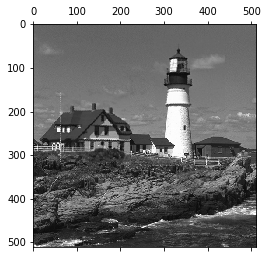

In [16]:
import numpy as np
from matplotlib import pyplot as plt
from math import sin, cos, atan2, pi, ceil, sqrt

with open("resize1.txt","r") as f:
    resize1 = f.read().splitlines()

f.close
with open("resize2.txt","r") as f:
    resize2 = f.read().splitlines()

f.close
with open("resize3.txt","r") as f:
    resize3 = f.read().splitlines()

f.close
resize1 = np.array((resize1),np.uint8)
resize1 = resize1.reshape(160,160)
resize2 = np.array((resize2),np.uint8)
resize2 = resize2.reshape(160,160)
resize3 = np.array((resize3),np.uint8)
resize3 = resize3.reshape(160,160)

resize = [resize3,resize1,resize2]
raw_image = open('lighthouse.raw','rb').read()
raw_image = np.frombuffer(raw_image, np.uint8)
img = raw_image[0:512*512]
img = np.reshape(img, (512,512))
img.setflags(write=1)

mask = np.array(([255]*160*160),np.uint8).reshape(160,160)


for i in range(512):
    for j in range(512):
        if np.array_equal(img[i:i+160,j:j+160],mask):
            print(i,j)
            print(i,j+160)
            print(i+160,j)
            print(i+160,j+160)
            print('next')
            img[i:i+160,j:j+160] = resize.pop()

plt.matshow(img,cmap='gray')
#plt.show()
